In [1]:
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
n_samples=500
X,y=datasets.make_circles(n_samples=n_samples,noise=0.1,factor=0.2,random_state=123)

In [3]:
x_data=torch.Tensor(X)
y_data=torch.Tensor(y.reshape(500,1))

In [4]:
class module(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super().__init__()
    self.linear1=nn.Linear(input_size,hidden_size)
    self.linear2=nn.Linear(hidden_size,output_size)
  def forward(self,x):
    x=torch.sigmoid(self.linear1(x))
    x=torch.sigmoid(self.linear2(x))
    return x
  def predict(self,x):
    x=forward(x)
    if x>=0.5:
      return 1
    else:
      return 0

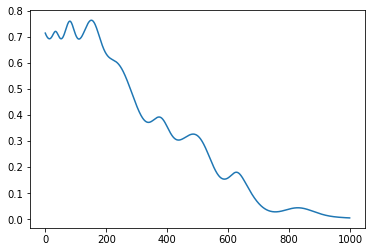

In [5]:
torch.manual_seed(2)
model=module(2,4,1)
criterion=nn.BCELoss()
optimiser=torch.optim.Adam(params=model.parameters(),lr=0.01)
epochs=1000
losses=[]
for i in range(epochs):
  y_pred=model.forward(x_data)
  loss=criterion(y_pred,y_data)
  losses.append(loss.item())
  optimiser.zero_grad
  loss.backward()
  optimiser.step()

plt.plot(range(epochs),losses)

In [14]:
 def plot_cont(): 
  x_span=np.linspace(min(X[:,0]),max(X[:,0]))
  y_span=np.linspace(min(X[:,0]),max(X[:,1]))
  xx,yy=np.meshgrid(x_span,y_span)
  grid=torch.tensor(np.c_[xx.ravel(),yy.ravel()]).float()
  z=model.forward(grid)
  z=z.view(xx.shape).detach().numpy()
  plt.contourf(xx,yy,z)

In [15]:
def scatter_plot():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])

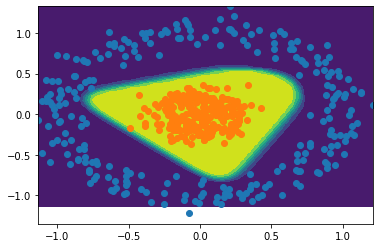

In [16]:
plot_cont()
scatter_plot()
plt.show()